# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
from scipy import stats 

# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


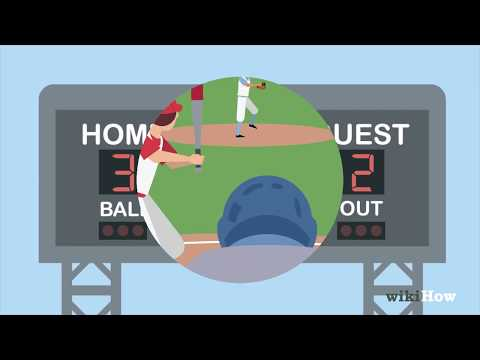

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

We start by importing the csv files to pandas dataframes

In [3]:
salaries=pd.read_csv('data/baseballdatabank-2023/contrib/Salaries.csv')
people=pd.read_csv('data/baseballdatabank-2023/core/People.csv')
pitching=pd.read_csv('data/baseballdatabank-2023/core/Pitching.csv')

We filter the salaries and pitching dataframes for the data with year up to 2010

In [4]:
salaries_filtered= salaries[salaries['yearID']<=2010].copy()
pitching_filtered= pitching[pitching['yearID']<=2010].copy()

For the salaries dataframe, we keep only the first occurence of the salary for each group player and year

In [5]:
salaries_first_per_year= salaries_filtered.groupby(['playerID','yearID'])[['teamID','lgID','salary']].apply(lambda x: x.iloc[0,:]).reset_index().copy()

In [6]:
print('Salaries shape:', salaries.shape,'\nSalaries shape after dropping data >2010:' ,salaries_filtered.shape, 
      '\nSalaries shape after dropping multiple salaries per year:', salaries_first_per_year.shape)

print('\nPeople shape:', people.shape)

print('\nPitching shape:', pitching.shape,'\nPitching shape after dropping data >2010:' ,pitching_filtered.shape)

Salaries shape: (26428, 5) 
Salaries shape after dropping data >2010: (21454, 5) 
Salaries shape after dropping multiple salaries per year: (21351, 5)

People shape: (20676, 24)

Pitching shape: (50402, 30) 
Pitching shape after dropping data >2010: (40433, 30)


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

We find that some of the rows have NaN or S throw fields, we can filter and keep only the entries with L and R.

In [7]:
print(set(people['throws']))
people_filtered = people[(people['throws']=='L')|(people['throws']=='R')].copy()
print(set(people_filtered['throws']))

{nan, 'S', 'R', 'L'}
{'R', 'L'}


**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

We apply a left-merge to the pitching dataframe with the people dataframe based on **playerID** to add the player information to the pitching dataframe. 

In [8]:
pitching_people= pitching_filtered.merge(people_filtered, on = 'playerID' ,how = 'left').copy()

**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

To compute the percentage of entries where the throws are missing, we group our dataframe by year and compute the percentage of NaN throw entries.

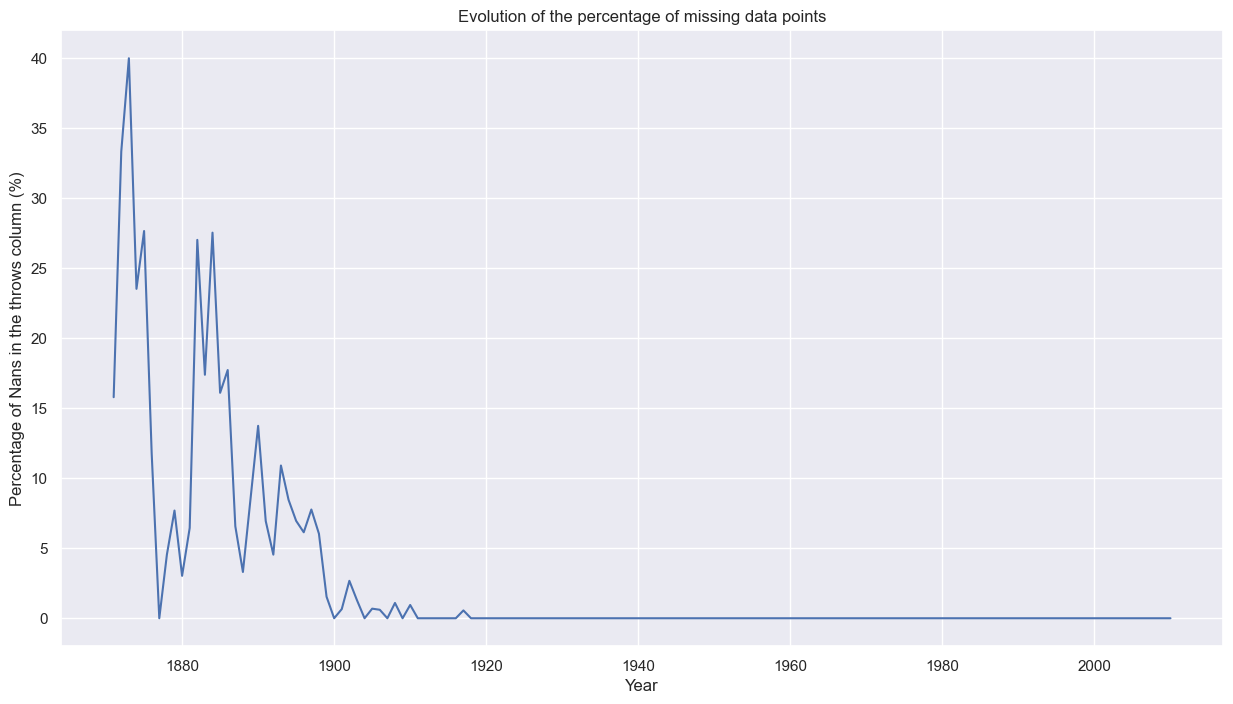

Percentage of missing data in 1892: 4.545454545454546 %


In [9]:
pitching_people_grouped = pitching_people.groupby('yearID')['throws'].apply(lambda x: x.isnull().sum()/len(x)*100).copy()
pitching_people_grouped.plot()
plt.ylabel('Percentage of Nans in the throws column (%)')
plt.xlabel('Year')
plt.title('Evolution of the percentage of missing data points')
plt.show()

print('Percentage of missing data in 1892:', pitching_people_grouped.loc[1892], '%')

**1.5 —** Filter the dataset you just merged (here in after `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



We filter the dataframe for **yearsID** after 1920

In [10]:
pitching_people_filtered = pitching_people[pitching_people['yearID']>=1920].copy()
salaries_filtered_after1920 = salaries_first_per_year[salaries_first_per_year['yearID']>=1920].copy() 

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers' salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [11]:
pitching_people_salaries = pitching_people_filtered.merge(salaries_filtered_after1920.drop(['teamID', 'lgID'], axis = 1), on = ['playerID', 'yearID'], how = 'left')
display(pitching_people_salaries)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


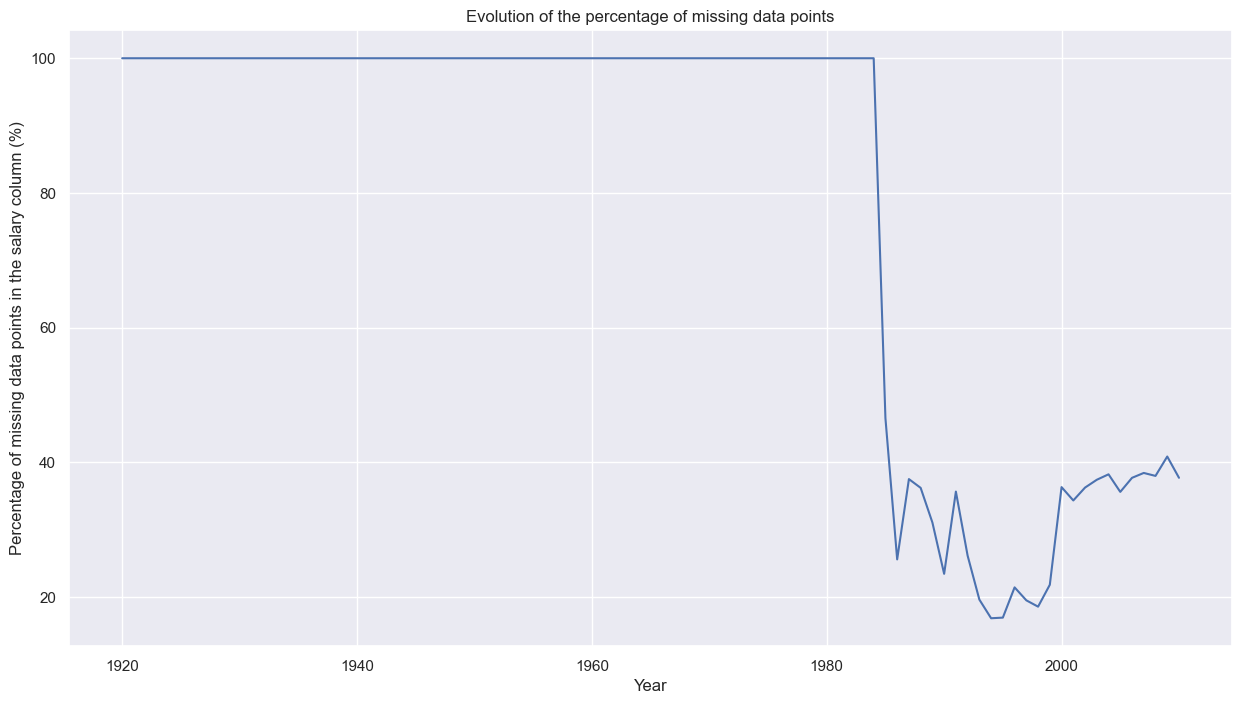

Percentage of missing data points in 2002: 36.26707132018209 %


In [12]:
salaries_nan_percentage = pitching_people_salaries.groupby('yearID')['salary'].apply(lambda x: x.isnull().sum()/len(x)*100).copy()
salaries_nan_percentage.plot()
plt.ylabel('Percentage of missing data points in the salary column (%)')
plt.xlabel('Year')
plt.title('Evolution of the percentage of missing data points')
plt.show()

print('Percentage of missing data points in 2002:', salaries_nan_percentage[2002], '%')

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [13]:
salaries_nan_percentage_filtered = salaries_nan_percentage[salaries_nan_percentage<100]
print('First year with salary data:', salaries_nan_percentage_filtered.reset_index()['yearID'].iloc[0])
print('Last year with salary data:', salaries_nan_percentage_filtered.reset_index()['yearID'].iloc[-1])

pitching_people_salaries_filtered = pitching_people_salaries[(pitching_people_salaries['yearID'] >= 1985)
                                                             & (pitching_people_salaries['yearID'] <= 2010)]
display(pitching_people_salaries_filtered)

First year with salary data: 1985
Last year with salary data: 2010


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
18432,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN
18433,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,Johnny Ray,185.0,72.0,R,R,1985-09-04,1985-10-03,abrej001,abregjo01,NaN
18434,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,170000.0
18435,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,147500.0
18436,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,Richard Warren,195.0,76.0,R,R,1985-06-12,2000-09-06,aguir001,aguilri01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [14]:
# PROVIDED CODE
df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

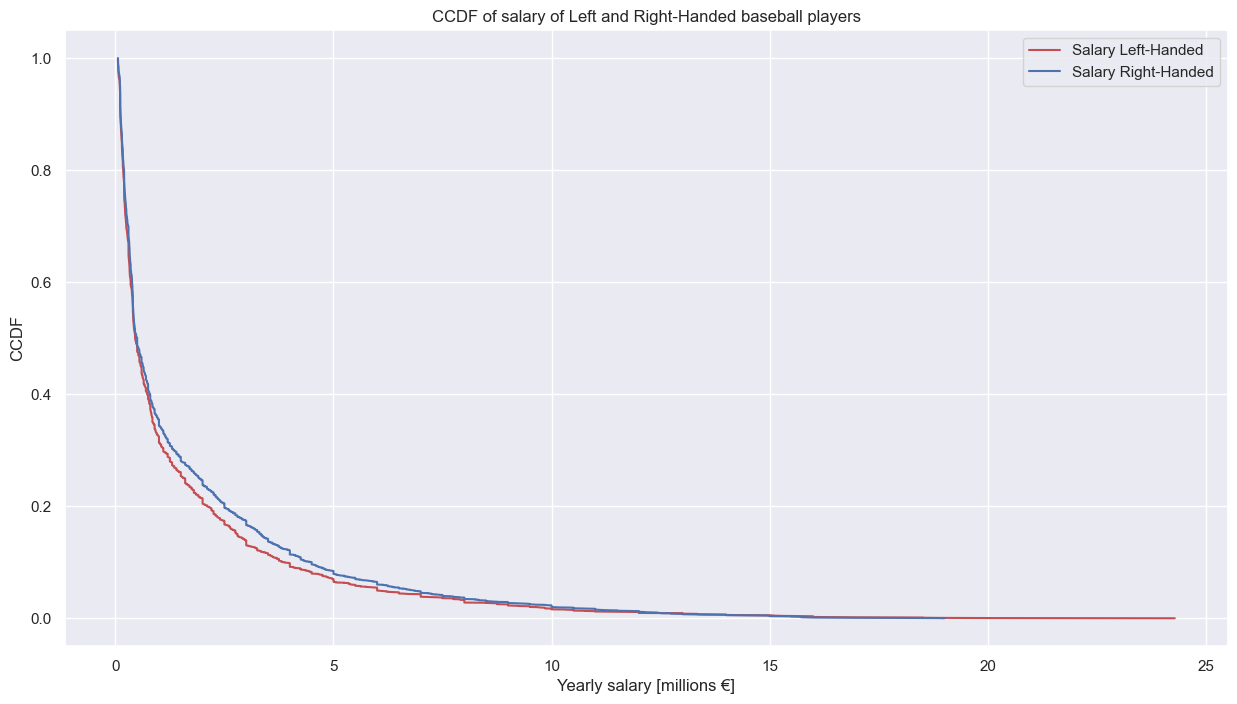

In [15]:
salary_right = df[df['throws'] == 'R']['salary'].dropna().sort_values()
salary_left = df[df['throws'] == 'L']['salary'].dropna().sort_values()

cdf_right = np.array([1/len(salary_right)]*len(salary_right)).cumsum()
ccdf_right = 1-cdf_right

cdf_left = np.array([1/len(salary_left)]*len(salary_left)).cumsum()
ccdf_left = 1-cdf_left

plt.plot(salary_left / 10**6, ccdf_left, label='Salary Left-Handed', color='r')
plt.plot(salary_right / 10**6, ccdf_right, label='Salary Right-Handed', color='b')
plt.title("CCDF of salary of Left and Right-Handed baseball players")
plt.xlabel("Yearly salary [millions €]")
plt.ylabel("CCDF")
plt.legend()
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

The plot does not give very meaningful information about the distribution.

To better understand its properties we can apply log transformation to the data:
- Applying log scale on the y we can recognise if the salary is distributed as an exponential.
- Applying log-log scale we can recognise if the salary is distributed as a power law and if it is fat-tailed.

In addition to the previous, the data does not take into account the inflation of the dollar over the period 1985-2010. We can adjust for inflation to have more reliable statistics about the salary distribution across the years.

**2.3 —** Implement the solution proposed by yourself in the previous question.

To adjust for inflation, we need to load a dataset from this <a href="https://www.in2013dollars.com/us/inflation/1985?endYear=2010&amount=1">link</a>, then we can adjust the salary to the 1985 inflation value and use it for our statistic.

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_r=ECDF(salary_right)
ecdf_l = ECDF(salary_left)

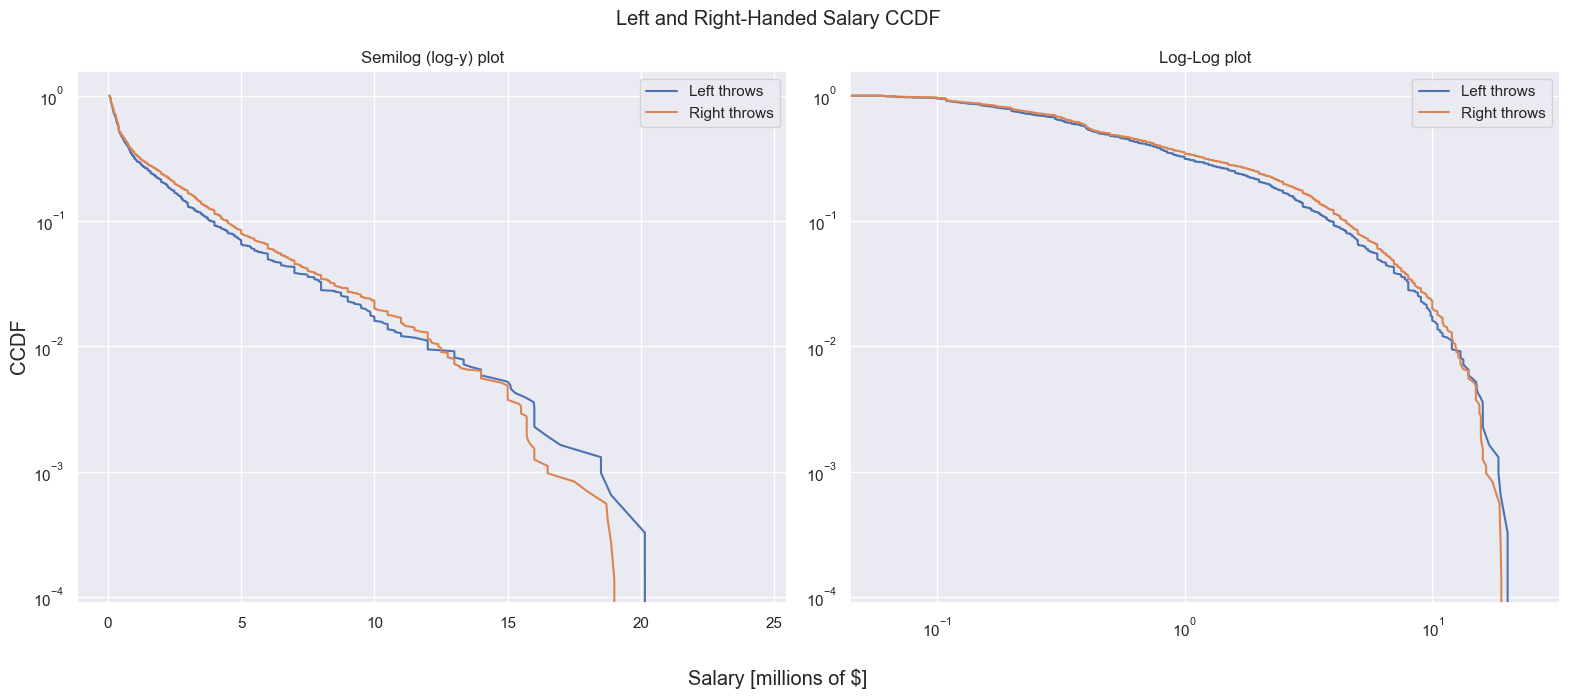

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

fig.suptitle('Left and Right-Handed Salary CCDF')
fig.supylabel('CCDF')
fig.supxlabel('Salary [millions of $]')

axes[0].set_title('Semilog (log-y) plot')
axes[0].plot(ecdf_l.x / 10**6, 1 - ecdf_l.y, label='Left throws')
axes[0].plot(ecdf_r.x / 10**6, 1 - ecdf_r.y, label='Right throws')
axes[0].set_yscale('log')
axes[0].legend()

axes[1].set_title('Log-Log plot')
axes[1].plot(ecdf_l.x / 10**6, 1 - ecdf_l.y, label='Left throws')
axes[1].plot(ecdf_r.x / 10**6, 1 - ecdf_r.y, label='Right throws')
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].legend()

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

# NOTE (SABRI): for me it's a y-log only plot that is needed, binning only if ccdf then noisy


**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

From the plots above, it is evident that:
- The data is definetely not distributed as a power law as the CCDF should resamble a straight line in the log-log plot.
- The data could be distributed as an exponential law as the semilog plot resambles a straight line, but it has fatter tails.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

We take the dataset from the previous point that already has the NaN values removed. We compute the mean and standard deviation of the left and ight-handed pitchers, and compute the 0.95 confidence interval. Then we create a point-plot of the previous findings.

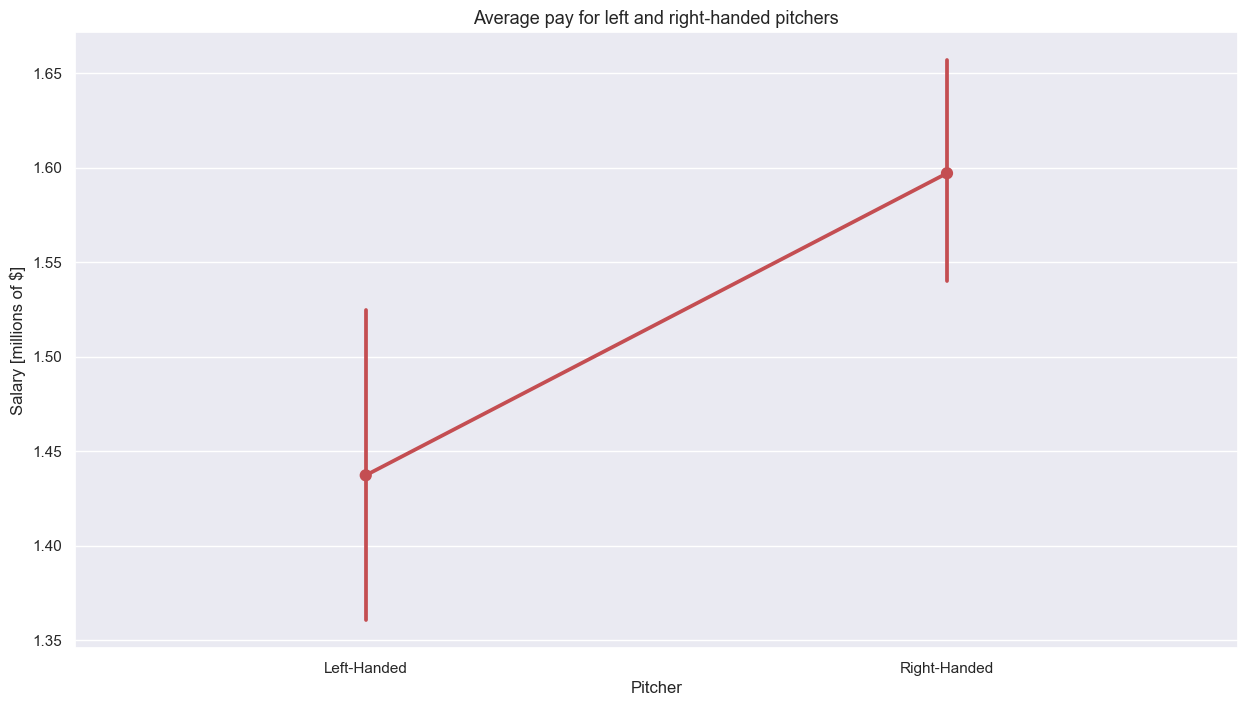

In [18]:
salary_right_mean = np.mean(salary_right)
salary_left_mean = np.mean(salary_left)

salary_right_std = np.std(salary_right)
salary_left_std = np.std(salary_left)

z_alpha = stats.norm.ppf(0.975) # when n large t-student --> normal

IC_lower_right = salary_right_mean-z_alpha*salary_right_std/np.sqrt(len(salary_right))
IC_lower_left = salary_left_mean-z_alpha*salary_left_std/np.sqrt(len(salary_left))

IC_upper_right = salary_right_mean+z_alpha*salary_right_std/np.sqrt(len(salary_right))
IC_upper_left = salary_left_mean+z_alpha*salary_left_std/np.sqrt(len(salary_left))

point_plot_df = pd.concat({'Left-Handed': salary_left / 10**6, 'Right-Handed': salary_right / 10**6}, axis=1)
sns.pointplot(data=point_plot_df, estimator='mean', errorbar=('ci', 95), color='r')
plt.title('Average pay for left and right-handed pitchers', size=13)
plt.xlabel('Pitcher', size=12)
plt.ylabel('Salary [millions of $]', size=12)
plt.show()


In [19]:
print("The mean for left-handed pitcher salary in million $: ", (salary_left_mean/10**6).round(3))
print("The mean for right-handed pitcher salary in million $: ", (salary_right_mean/10**6).round(3))

print("The confidence interval for left-handed pitcher salary in million $ is {", (IC_lower_left/10**6).round(3), ", ", (IC_upper_left/10**6).round(3),"}")
print("The confidence interval for right-handed pitcher salary in million $ is {", (IC_lower_right/10**6).round(3), ", ", (IC_upper_right/10**6).round(3),"}")

The mean for left-handed pitcher salary in million $:  1.437
The mean for right-handed pitcher salary in million $:  1.597
The confidence interval for left-handed pitcher salary in million $ is { 1.353 ,  1.522 }
The confidence interval for right-handed pitcher salary in million $ is { 1.54 ,  1.655 }


**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

As the confidence interval of the left and right-handed pitchers don't overlap, we can reject the null hypothesis that the mean of the left and right-handed pitcher salaries are the same. Therefore, we can conclude that the salary distributions are statistically distinct at a 95% confidence level.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

We perform a welsch t-test because in our data we don't assume equal variance among the different categories, since the two categories are also very different in sample size.

In [20]:
t_stat, p_value = stats.ttest_ind(salary_left, salary_right, equal_var=False)
print('The p-value is', p_value.round(5))

The p-value is 0.00221


The p-value is lower than 0.05 so we can reject the null hypothesis of the same salary for both categories as we expected from the previous visual inspection.

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played at least 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

We notice that same player change teams within the season. This can lead to have for some player to be counted multiple times if they played more than five games in all teams, or to be dropped even if the aggregate number of played games is higher than 5. We aggregate these values using a weighted means of betting average opponents for each team the player played for.

In [21]:
BAOpp_right = df[(df['throws'] == 'R')].groupby(['playerID','yearID']).filter(lambda x: x.G.sum() >= 5) \
    .groupby(['playerID','yearID']).apply(lambda x: (x.G*x.BAOpp).sum() / x.G.sum()).dropna().sort_values()
BAOpp_left = df[(df['throws'] == 'L')].groupby(['playerID','yearID']).filter(lambda x: x.G.sum() >= 5) \
    .groupby(['playerID','yearID']).apply(lambda x: (x.G*x.BAOpp).sum() / x.G.sum()).dropna().sort_values()

In [22]:
BAOpp_right_mean = np.mean(BAOpp_right)
BAOpp_left_mean = np.mean(BAOpp_left)

In [23]:
print("The mean for left-handed pitcher battling average:", BAOpp_left_mean.round(4))
print("The mean for right-handed pitcher battling average:", BAOpp_right_mean.round(4))

The mean for left-handed pitcher battling average: 0.2699
The mean for right-handed pitcher battling average: 0.2676


The means seem slightly different but to understand if the difference is statistically significant we need to run a t-test.

In [24]:
t_stat, p_value = stats.ttest_ind(BAOpp_left, BAOpp_right, equal_var=False)
print('The p-value is', p_value.round(5))

The p-value is 0.01393


The p-value is lower than 0.05 so we can reject the null hypothesis that the two means are the same. From these findings it seems that the left-handed players outperform the right-handed ones. 

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

_a) T-test on salaries in 2000_

In [25]:
# Select the (non-nan) salaries for left/right pitchers in 2000
salary_right_2000 = df[(df['throws'] == 'R') & (df['yearID'] == 2000)]['salary'].dropna().sort_values()
salary_left_2000 = df[(df['throws'] == 'L') & (df['yearID'] == 2000)]['salary'].dropna().sort_values()

# Perform a t-test, again not assuming same variance in different categories
t_stat,p_value = stats.ttest_ind(salary_right_2000, salary_left_2000, equal_var = False)

In [26]:
print('p-value is', p_value.round(5))

p-value is 0.71505


A t-test on salary data from 2000 yields a p-value of 0.71 (> 0.05) - this means that there is not enough evidence to reject the null hypothesis that the means are the same in 2000.

_b) T-test on opponents' batting average in 2000_

In [27]:
# Select the (non-nan) opponents' batting averages (OBA) for left/right pitchers in 2000
BAOpp_right_2000 = df[(df['throws'] == 'R') & (df['yearID'] == 2000)]['BAOpp'].dropna().sort_values()
BAOpp_left_2000 = df[(df['throws'] == 'L') & (df['yearID'] == 2000)]['BAOpp'].dropna().sort_values()

# Perform a t-test
t_stat,p_value =stats.ttest_ind(BAOpp_right_2000, BAOpp_left_2000, equal_var = False)

In [28]:
print('p-value is', p_value.round(5))

p-value is 0.15895


A t-test on opponent's batting average data in 2000 yields a p-value of 0.16 (> 0.05) - this means that there is not enough evidence to reject the null hypothesis that the means are the same for that year only.

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

First, we create the different tables for the pitchers, the average salary and the average batting average:

In [29]:
# left and right handed pitchers per year:
left_per_year = df[df['throws']=='L'].groupby(['yearID']).throws.count()
right_per_year = df[df['throws']=='R'].groupby(['yearID']).throws.count()
total_serie = left_per_year + right_per_year
# average salary per year
average_salary_per_year = df.groupby(['yearID'])['salary'].mean()
# average BAopp per year
average_BAOpp_per_year = df.groupby(['yearID'])['BAOpp'].mean()

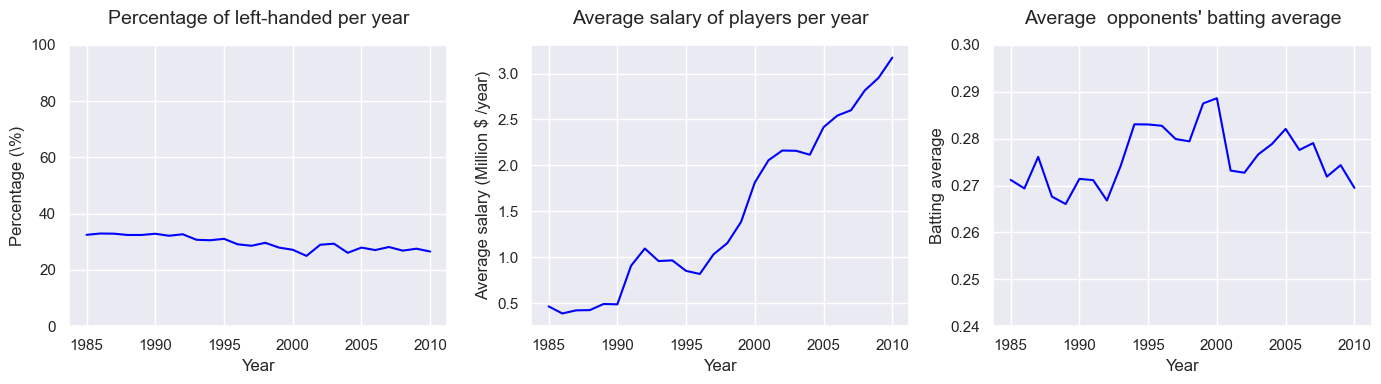

In [30]:
fig, ax = plt.subplots(1,3,figsize= (14,4), sharey = False, sharex = True)

ax[0].set_ylabel('Percentage (\%)')
ax[0].set_xlabel('Year')
ax[0].set_ylim([0, 100])
ax[0].plot(100*left_per_year/total_serie, 'blue')
ax[0].set_title('Percentage of left-handed per year', pad=15, fontsize=14)

ax[1].set_ylabel('Average salary (Million \$ /year)')
ax[1].set_xlabel('Year')
ax[1].plot(average_salary_per_year/1e6, 'blue')
ax[1].set_title('Average salary of players per year', pad=15, fontsize=14)

ax[2].set_ylabel('Batting average') 
ax[2].set_ylim([0.24, 0.3])
ax[2].set_xlabel('Year')
ax[2].plot(average_BAOpp_per_year, 'blue')
ax[2].set_title('Average  opponents\' batting average', pad=15, fontsize=14)

plt.tight_layout()

In [31]:
## YEAR 2007
percentage_of_left_handed_players_per_year = 100*left_per_year/total_serie
print('For the year 2007 :')
print('\n - The percentage of left handed player was ',round(percentage_of_left_handed_players_per_year.loc[2007],2),'%')
print('\n - The average salary was ',round(average_salary_per_year.loc[2007]/10**6,3),'million $')
print('\n - The  opponents\' batting average ',round(average_BAOpp_per_year.loc[2007],3))

For the year 2007 :

 - The percentage of left handed player was  28.16 %

 - The average salary was  2.601 million $

 - The  opponents' batting average  0.279


_Discussion_

One can observe that the percentage of left-handed players slightly decreased over the past few years and remained well below the proportion of right-handed players throughout the study interval. On the other hand, the average salary per player steadily increased since the year 1990: the average salary was 6 times higher in 2010 than in 1990 (the effect of inflation should be considered, however). Lastly, the average opponent's batting average remained approximately constant throughout the period of interest, with only a slight peak around the year 2000.

_Bonus_

To have a better understanding we decided to import inflation data and look at the salary inflation-adjusted.

In [32]:
inflation_data = pd.read_csv('data/inflation_data.csv', delimiter=',')

df_inflation = df.merge(inflation_data, how='left', on='yearID')
df_inflation['salary'] = df_inflation['salary'] / df_inflation['amount'] 

avg_salary_infl_adj = df_inflation.groupby('yearID')['salary'].mean()

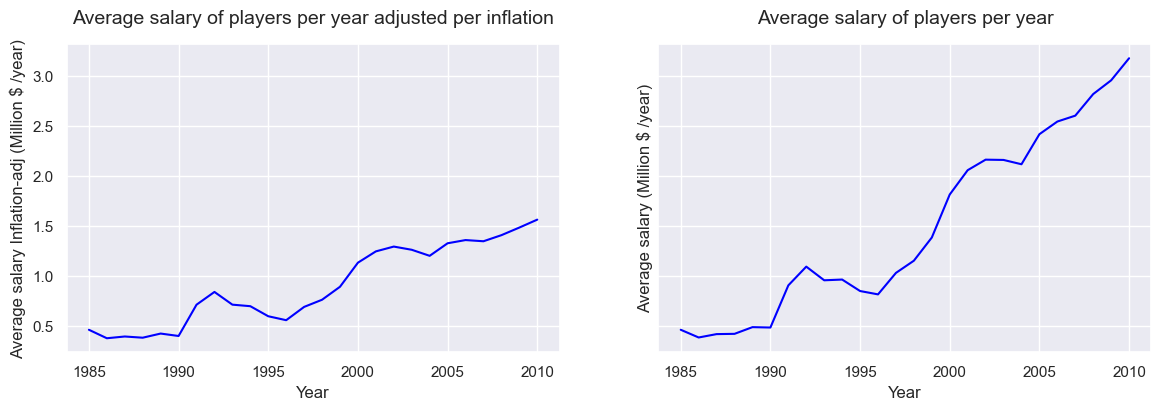

In [33]:
fig, ax = plt.subplots(1,2,figsize= (14,4), sharey = True, sharex = False)

ax[0].set_ylabel('Average salary Inflation-adj (Million \$ /year)')
ax[0].set_xlabel('Year')
ax[0].plot(avg_salary_infl_adj/1e6, 'blue')
ax[0].set_title('Average salary of players per year adjusted per inflation', pad=15, fontsize=14)

ax[1].set_ylabel('Average salary (Million \$ /year)')
ax[1].set_xlabel('Year')
ax[1].plot(average_salary_per_year/1e6, 'blue')
ax[1].set_title('Average salary of players per year', pad=15, fontsize=14)

plt.show()

As we can see, if we add the information of inflation, it is still clear that the salary mean steadly incresed during the period taken into consideration. However the magnitude of increse is not as large.

**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.

Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

We start by extracting the salary and OBA data with their associated year from the inital dataframe.

In [34]:
# Extract both salary and year from initial dataframe
salary_by_year_right = df[df['throws'] == 'R'][['salary', 'yearID']].dropna().sort_values(by='yearID')
salary_by_year_left = df[df['throws'] == 'L'][['salary', 'yearID']].dropna().sort_values(by='yearID')

# Extract both OBA and year from initial dataframe
BAOpp_by_year_right = df[(df['throws'] == 'R')&(df['G']>=5)][['BAOpp', 'yearID']].dropna().sort_values(by='yearID')
BAOpp_by_year_left = df[(df['throws'] == 'L')&(df['G']>=5)][['BAOpp', 'yearID']].dropna().sort_values(by='yearID')

The statistics needed for the plot (mean and 95% confidence interval) are then computed for each year, for both salary and OBA data.

_Note:_ to compute the confidence interval for the mean of the data, the same assumption is made as in Tasks 2.7 and 2.8. Namely, we assume that given the relatively high number of samples (over 14 000 rows in the inital dataframe), the means of the samples should be normally distributed (by the Central Limit Theorem). The 95% confidence interval is then given by 1.96*SEM, where the standard error of the mean (SEM) is given by:

$SEM = Standard \ deviation/\sqrt{Sample \ size}$.

<a href="https://www.healthknowledge.org.uk/e-learning/statistical-methods/practitioners/standard-error-confidence-intervals">Source</a>

In [35]:
z_alpha = stats.norm.ppf(0.975)

# Calculate yearly stats for salary data
salary_by_year_right_stats = salary_by_year_right.groupby(salary_by_year_right['yearID']).apply(lambda x: pd.Series({
        'mean': x['salary'].mean(),
        'IC_lower': x['salary'].mean()-z_alpha*x['salary'].std()/np.sqrt(len(x['salary'])),
        'IC_upper': x['salary'].mean()+z_alpha*x['salary'].std()/np.sqrt(len(x['salary']))
    }))
salary_by_year_left_stats = salary_by_year_left.groupby(salary_by_year_left['yearID']).apply(lambda x: pd.Series({
        'mean': x['salary'].mean(),
        'IC_lower': x['salary'].mean()-z_alpha*x['salary'].std()/np.sqrt(len(x['salary'])),
        'IC_upper': x['salary'].mean()+z_alpha*x['salary'].std()/np.sqrt(len(x['salary']))
    }))


# Calculate yearly stats for OBA data
BAOpp_by_year_right_stats = BAOpp_by_year_right.groupby(BAOpp_by_year_right['yearID']).apply(lambda x: pd.Series({
        'mean': x['BAOpp'].mean(),
        'IC_lower': x['BAOpp'].mean()-z_alpha*x['BAOpp'].std()/np.sqrt(len(x['BAOpp'])),
        'IC_upper': x['BAOpp'].mean()+z_alpha*x['BAOpp'].std()/np.sqrt(len(x['BAOpp']))
    }))
BAOpp_by_year_left_stats = BAOpp_by_year_left.groupby(BAOpp_by_year_left['yearID']).apply(lambda x: pd.Series({
        'mean': x['BAOpp'].mean(),
        'IC_lower': x['BAOpp'].mean()-z_alpha*x['BAOpp'].std()/np.sqrt(len(x['BAOpp'])),
        'IC_upper': x['BAOpp'].mean()+z_alpha*x['BAOpp'].std()/np.sqrt(len(x['BAOpp']))
    }))

We can now make a filled plot showing the evolution of the average salary/OBA over the years with 95% confidence inervals.

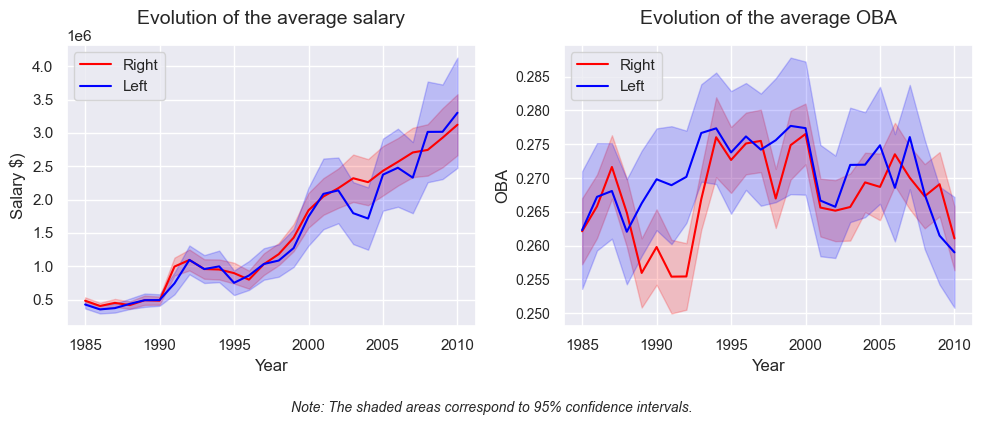

In [36]:
# Prepare plot with 2 panels, only x-axis (years) shared, as y-axes of different nature.
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True)

# Filled plot of the evolution of average salaries (red: right, blue: left)
ax[0].fill_between(salary_by_year_right_stats.index, salary_by_year_right_stats['IC_lower'],
                 salary_by_year_right_stats['IC_upper'], alpha = 0.2, color = 'red')
ax[0].plot(salary_by_year_right_stats.index, salary_by_year_right_stats['mean'], color = 'red')

ax[0].fill_between(salary_by_year_left_stats.index, salary_by_year_left_stats['IC_lower'],
                 salary_by_year_left_stats['IC_upper'], alpha = 0.2, color = 'blue')
ax[0].plot(salary_by_year_left_stats.index, salary_by_year_left_stats['mean'], color = 'blue')

ax[0].set_xlabel('Year')
ax[0].set_ylabel('Salary $)')
ax[0].set_title('Evolution of the average salary', pad=15, fontsize=14)

lines = [ax[0].get_lines()[0], ax[0].get_lines()[1]]
labels = ['Right', 'Left']
ax[0].legend(lines, labels, loc='upper left')

# Filled plot of the evolution of average 0BAs (red: right, blue: left)
ax[1].fill_between(BAOpp_by_year_right_stats.index, BAOpp_by_year_right_stats['IC_lower'],
                 BAOpp_by_year_right_stats['IC_upper'], alpha = 0.2, color = 'red')
ax[1].plot(BAOpp_by_year_right_stats.index, BAOpp_by_year_right_stats['mean'], color = 'red')

ax[1].fill_between(BAOpp_by_year_left_stats.index, BAOpp_by_year_left_stats['IC_lower'],
                 BAOpp_by_year_left_stats['IC_upper'], alpha = 0.2, color = 'blue')
ax[1].plot(BAOpp_by_year_left_stats.index, BAOpp_by_year_left_stats['mean'], color = 'blue')

ax[1].set_xlabel('Year')
ax[1].set_ylabel('OBA')
ax[1].set_title('Evolution of the average OBA', pad=15, fontsize=14) 
lines = [ax[1].get_lines()[0], ax[1].get_lines()[1]]
labels = ['Right', 'Left']
ax[1].legend(lines, labels, loc='upper left')
ax[1].tick_params(axis='y', labelsize=10)

# Layout adjustment and explanatory note
fig.tight_layout()
side_note = "Note: The shaded areas correspond to 95% confidence intervals."
fig.text(0.5, -0.05, side_note, ha='center', fontstyle='italic', fontsize=10)
plt.show()

In [37]:
# Required prints
print('Average salary of left-handed pitchers in 1999:', round(salary_by_year_left_stats.loc[1999, 'mean']/10**6, 3), 'million $')
print('Average opponents\' batting average of right-handed pitchers in 1999:', round(BAOpp_by_year_right_stats.loc[1999, 'mean'], 3))

Average salary of left-handed pitchers in 1999: 1.273 million $
Average opponents' batting average of right-handed pitchers in 1999: 0.275


Given the large salary difference over the course of the period of interest, we can barely see what happens in the 1980s: the confidence intervals are too small to properly visualise. That is why we chose to remake the left plot using a logarithmic y-axis.

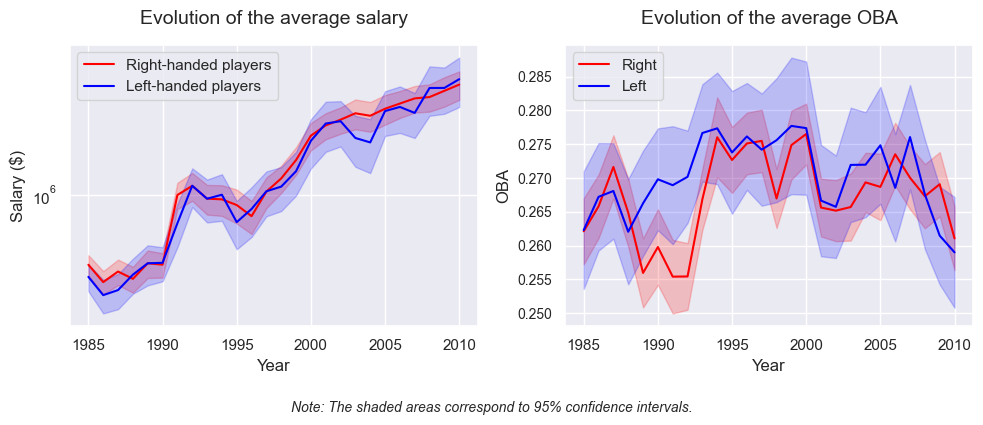

In [38]:
# Prepare plot with 2 panels, only x-axis (years) shared, as y-axes of different nature.
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True)

# Filled plot of the evolution of average salaries (red: right, blue: left)
ax[0].fill_between(salary_by_year_right_stats.index, salary_by_year_right_stats['IC_lower'],
                 salary_by_year_right_stats['IC_upper'], alpha = 0.2, color = 'red')
ax[0].plot(salary_by_year_right_stats.index, salary_by_year_right_stats['mean'], color = 'red')

ax[0].fill_between(salary_by_year_left_stats.index, salary_by_year_left_stats['IC_lower'],
                 salary_by_year_left_stats['IC_upper'], alpha = 0.2, color = 'blue')
ax[0].plot(salary_by_year_left_stats.index, salary_by_year_left_stats['mean'], color = 'blue')

ax[0].set_xlabel('Year')
ax[0].set_ylabel('Salary ($)')
ax[0].set_title('Evolution of the average salary', pad=15, fontsize=14)

lines = [ax[0].get_lines()[0], ax[0].get_lines()[1]]
labels = ['Right-handed players', 'Left-handed players']
ax[0].legend(lines, labels, loc='upper left')
ax[0].set_yscale('log')

# Filled plot of the evolution of average 0BAs (red: right, blue: left)
ax[1].fill_between(BAOpp_by_year_right_stats.index, BAOpp_by_year_right_stats['IC_lower'],
                 BAOpp_by_year_right_stats['IC_upper'], alpha = 0.2, color = 'red')
ax[1].plot(BAOpp_by_year_right_stats.index, BAOpp_by_year_right_stats['mean'], color = 'red')

ax[1].fill_between(BAOpp_by_year_left_stats.index, BAOpp_by_year_left_stats['IC_lower'],
                 BAOpp_by_year_left_stats['IC_upper'], alpha = 0.2, color = 'blue')
ax[1].plot(BAOpp_by_year_left_stats.index, BAOpp_by_year_left_stats['mean'], color = 'blue')

ax[1].set_xlabel('Year')
ax[1].set_ylabel('OBA')
ax[1].set_title('Evolution of the average OBA', pad=15, fontsize=14) 
lines = [ax[1].get_lines()[0], ax[1].get_lines()[1]]
labels = ['Right', 'Left']
ax[1].legend(lines, labels, loc='upper left')
ax[1].tick_params(axis='y', labelsize=10)

# Layout adjustment and explanatory note
fig.tight_layout()
side_note = "Note: The shaded areas correspond to 95% confidence intervals."
fig.text(0.5, -0.05, side_note, ha='center', fontstyle='italic', fontsize=10)

plt.show()

_Discussion_

The plot of salary evolution shows that the average salary of left- and right-handed players remain very similar throughout the years. Notable differences (when confidence intervals overlap the least) briefly appear around the years 1986 and 2004, with a slightly higher average for right-handed players.

Likewise, the opponents' batting average of left- and right-handed players evolve similarly thoughout the studied interval, with a short noticeable difference around the year 1990. In fact, in the years 1991/1992 the 95% confidence intervals don't overlap at all, meaning the difference between the means is significant.

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.2 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

The results from Task 3 are pretty clear: left- and right-handed players seem to have both very similar salaries and opponents' batting averages over the years. This seems to contradict the results from Tasks 2.7 and 2.8, where our t-tests led us to reject the null hypothesis that the averages were the same.

In the case of the opponents' batting averages, an element of answer could be that for a few years around 1990 the difference between left- and right-handed players was indeed fairly significant. However, this explanation seems insufficient to explain the substantial discrepancy between the results of the two Tasks, and certainly isn't enough to explain the contradicting conclusions for the salary distributions.

Another more convincing explanation is that Simpson's paradox is at play: aggregating the data of mutlitple years gives results that are incoherent with the groups of data taken individually. This phenomenon can in the case of the salaries best be explained by the following two trends in the data:
- the percentage of left-handed players steadily decreases;
- the average salary dramatically increases.
Although the means within the same year are similar, a higher proportion of right-handed players in the years with higer salaries could shift their overall mean upwards, leading to the discrepancy in our results. Simpson's paradox probably influenced the results in a similar fashion, though perhaps less signficantly, in the case of the opponent's batting averages (the OBA is slightly higher in the middle of the interval).

The proper conclusion is to be drawn from the data taken year by year, however, not the aggregated one: the difference between left- and right-handed player's salary and performance is not signficant.

The aforementionned concept is illustrated in the drawing below with exagerated proportions:

<img src="images/simpson_baseball.png" alt="alt text" title="Simpson paradox ilustrated" />

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salaries for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


**Method 1: Using the Central Limit Theorem as before**

**Note : 95% CIs will also be plotted with bootstrapping method, this will allow us to have the method ready for other tasks and to perform a quick comparison of the two**

In [39]:
salary_by_year_right = df[df['throws'] == 'R'].groupby(['yearID'])['salary']
salary_by_year_left = df[df['throws'] == 'L'].groupby(['yearID'])['salary']

salaries_nan_percentage_right = salary_by_year_right.apply(lambda x: x.isnull().mean()).copy()
salaries_nan_percentage_left = salary_by_year_left.apply(lambda x: x.isnull().mean()).copy()

z_alpha = 1.96

salaries_nan_std_right = salary_by_year_right.apply(lambda x: z_alpha*x.isnull().std()/np.sqrt(len(x))).copy()
salaries_nan_std_left = salary_by_year_left.apply(lambda x: z_alpha*x.isnull().std()/np.sqrt(len(x))).copy()


 Note: The shaded areas correspond to 95% confidence intervals.


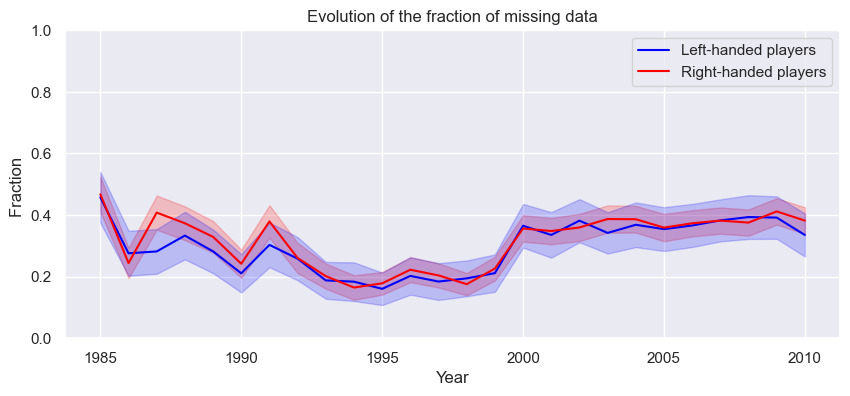

In [40]:
plt.figure(figsize= (10,4))

plt.ylabel('Fraction ')
plt.xlabel('Year')
plt.ylim([0, 1])

plt.plot(salaries_nan_percentage_left, color = 'blue')
plt.plot(salaries_nan_percentage_right, color = 'red')

plt.legend(['Left-handed players','Right-handed players'])

plt.fill_between(salaries_nan_percentage_right.index, salaries_nan_percentage_right.values-salaries_nan_std_right.values,
                 salaries_nan_percentage_right.values+salaries_nan_std_right.values, alpha = 0.2, color = 'red')

plt.fill_between(salaries_nan_percentage_left.index, salaries_nan_percentage_left-salaries_nan_std_left,
                 salaries_nan_percentage_left.values+salaries_nan_std_left.values, alpha = 0.2, color = 'blue')
plt.title("Evolution of the fraction of missing data")

# Explanatory note
print("\n Note: The shaded areas correspond to 95% confidence intervals.")

In [41]:
## YEAR 2002
print('For the year 2002 :')
print('\n - The Fraction of left handed player with salary data missing was ',round(salaries_nan_percentage_left.loc[2002],2))

For the year 2002 :

 - The Fraction of left handed player with salary data missing was  0.38


**Method 2: with bootstrapping:**

In [42]:
def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.
    
    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate
    
    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    mean = data.mean()
    means = np.zeros(iterations)
    
    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = bootstrap_sample.mean()
        
    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)
    
    return (mean, lower_bound, upper_bound)

In [43]:
CI_serie_mean_left = pd.Series()
CI_serie_down_left = pd.Series()
CI_serie_up_left = pd.Series()

for year in set(df['yearID'].values):
    data = df.query("yearID =="+str(year)+" and throws=='L'")["salary"].isnull()
    mean, lower_bound, upper_bound = bootstrap_confidence_interval(data, iterations=1000)
    CI_serie_mean_left[year] = mean
    CI_serie_down_left[year] = lower_bound
    CI_serie_up_left[year] = upper_bound
    
CI_serie_mean_right = pd.Series()
CI_serie_down_right = pd.Series()
CI_serie_up_right = pd.Series()

for year in set(df['yearID'].values):
    data = df.query("yearID =="+str(year)+" and throws=='R'")["salary"].isnull()
    mean, lower_bound, upper_bound = bootstrap_confidence_interval(data, iterations=1000)
  
    CI_serie_mean_right[year] = mean
    CI_serie_down_right[year] = lower_bound
    CI_serie_up_right[year] = upper_bound


C:\Users\dandr_wh38grr\AppData\Local\Temp\ipykernel_16660\9182425.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  CI_serie_mean_left = pd.Series()
C:\Users\dandr_wh38grr\AppData\Local\Temp\ipykernel_16660\9182425.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  CI_serie_down_left = pd.Series()
C:\Users\dandr_wh38grr\AppData\Local\Temp\ipykernel_16660\9182425.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  CI_serie_up_left = pd.Series()


IndexError: index 1985 is out of bounds for axis 0 with size 0

For the year 2002 :

 - The Fraction of left handed player with salary data missing was  0.38

 
 Note: The shaded areas correspond to 95% confidence intervals.


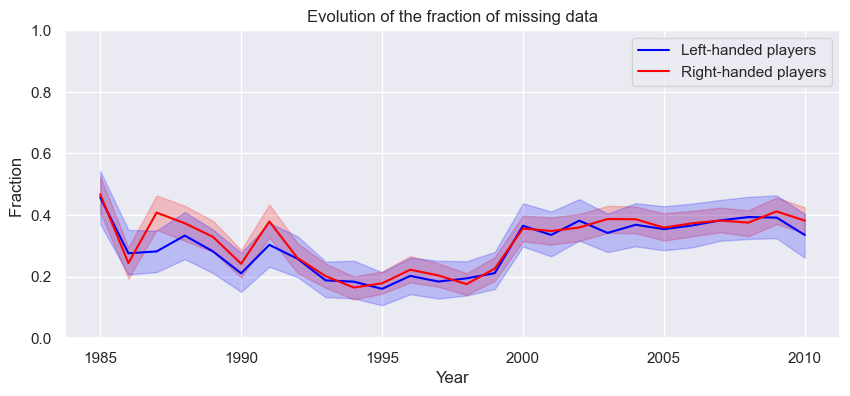

In [ ]:
plt.figure(figsize= (10,4))

plt.ylabel('Fraction ')
plt.xlabel('Year')
plt.ylim([0, 1])
plt.plot(CI_serie_mean_left, color = 'blue')
plt.plot(CI_serie_mean_right, color = 'red')
plt.legend(['Left-handed players','Right-handed players'])

plt.fill_between(CI_serie_mean_right.index, CI_serie_down_right.values,
                 CI_serie_up_right.values, alpha = 0.2, color = 'red')

plt.fill_between(CI_serie_mean_left.index, CI_serie_down_left.values,
                 CI_serie_up_left.values, alpha = 0.2, color = 'blue')

plt.title("Evolution of the fraction of missing data")

## YEAR 2002
print('For the year 2002 :')
print('\n - The Fraction of left handed player with salary data missing was ',round(salaries_nan_percentage_left.loc[2002],2))


# Explanatory note:
print("\n \n Note: The shaded areas correspond to 95% confidence intervals.")

_Discussion_

One can first observe very similar CIs with the two methods, showing that using the CLT was a good method to compute the CIs. Then, according to the plot, there is never a significant difference between the fraction of missing data for left- and right-handed players. The most noticeable difference is around the years 1986/1987, but even then the confidence intervals still slightly overlap. One can notice that this overlap is slighter when CIs are plotted with the CLT method.

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

The answer mainly depends on the way the 5% data are sampled from the right-handed group. However, it is very likely that this would lead to biased estimates of the mean and the variance of the right-handed group. This would modify our analysis in a few ways :

* First, if the number of samples for right-handed players is too small, an assumption of the Central Limit Theorem (used to compute the CIs) will not hold anymore;

* Then, even if having different sample size is not an issue for the t-test, the t-test we use assue a normal distribution of the means, see [Wikipedia t-test](https://en.wikipedia.org/wiki/Student's_t-test) assumptions paragraph, this assumption can be violated since we have way less sample and that the CLT might not apply anymore. The t-test should be then used with more precautions.

* Finally, undersampling the right-handed group could lead to have a high variance on the mean estimation when using the bootstraping method to compute CIs. This would lead to large confidence intervals, perhaps undermining the relevance of comparisons between the two groups of data.

_michpietrosanso change_

The answer mainly depends on the way the 5% data are sampled from the right-handed group. However, it is very likely that this would lead to biased estimates of the mean and the variance of the right-handed group. This would modify our analysis in a few ways :

* First, if the number of samples for right-handed players is too small, an assumption of the Central Limit Theorem (used to compute the CIs) will not hold anymore;

* Then, even if having different sample size is not an issue for the t-test, the t-test we use assue a normal distribution of the means, see [Wikipedia t-test](https://en.wikipedia.org/wiki/Student's_t-test) assumptions paragraph, this assumption can be violated since we have way less sample and that the CLT might not apply anymore. The t-test should be then used with more precautions.

* Finally, undersampling the right-handed group could lead to have a high variance on the mean estimation since the confidence intervals width is high when the number of observations is lowered.